<a href="https://colab.research.google.com/github/RashmiBhagya/HelthyBanana-Detection-Model/blob/main/banana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q



In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

Load Dataset

In [4]:
# download dataset
od.download("https://www.kaggle.com/datasets/rashmipremadasa/good-banana-detection-chemical-or-not")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rashmipremadasa
Your Kaggle Key: ··········


100%|██████████| 1.28G/1.28G [00:15<00:00, 86.5MB/s]


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [6]:
train_data_dir = "/content/good-banana-detection-chemical-or-not/Banana/Banana"
test_data_dir = "/content/good-banana-detection-chemical-or-not/Banana/Banana"


In [7]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 859 files belonging to 2 classes.
Using 774 files for training.
Found 859 files belonging to 2 classes.
Using 85 files for validation.
Found 859 files belonging to 2 classes.


In [8]:
class_names = train_data.class_names
class_names

['Chemical', 'Non-Chemical']

In [9]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


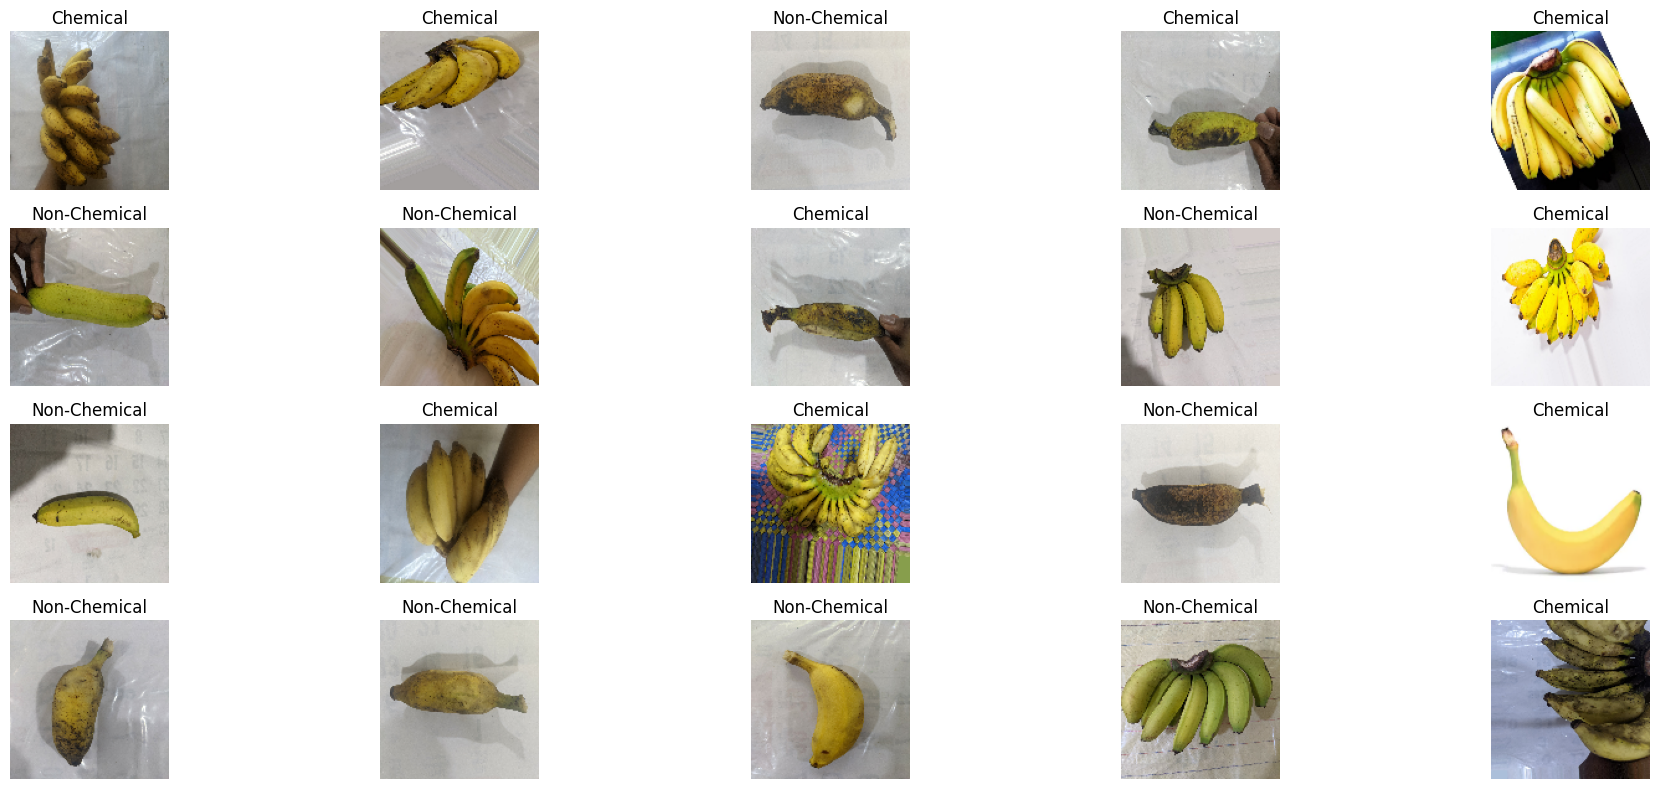

In [10]:
import matplotlib.pyplot as plt

# Plot data sample
plt.figure(figsize=(20, 8))
for image, label in train_data.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i+1)  # Adjusted to 4 rows and 5 columns
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()


Scaling Images


In [11]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[195.71875  197.95312  192.875   ]
   [194.98438  196.48438  192.23438 ]
   [197.4375   197.4375   195.4375  ]
   ...
   [195.40625  193.40625  198.40625 ]
   [192.28125  189.28125  196.28125 ]
   [196.14062  193.14062  200.14062 ]]

  [[197.9375   197.9375   195.9375  ]
   [204.23438  204.23438  202.23438 ]
   [206.82812  206.82812  204.82812 ]
   ...
   [189.0625   187.0625   192.0625  ]
   [192.125    189.125    198.125   ]
   [195.73438  192.73438  201.73438 ]]

  [[198.45312  198.45312  196.45312 ]
   [200.75     201.75     196.75    ]
   [199.4375   199.4375   197.4375  ]
   ...
   [197.39062  195.39062  200.39062 ]
   [197.42188  194.42188  201.42188 ]
   [197.92188  194.92188  201.92188 ]]

  ...

  [[150.1875   151.1875   153.1875  ]
   [151.14062  150.14062  155.14062 ]
   [149.76562  150.76562  154.76562 ]
   ...
   [169.1875   167.1875   170.1875  ]
   [166.35938  164.35938  167.35938 ]
   [166.23438  164.23438  165.23438 ]]

  [[155.67188  154.67188  159.6718

In [12]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [13]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.7765319  0.76574755 0.78045344]
   [0.7901348  0.78229165 0.79405636]
   [0.79742646 0.7895833  0.80134803]
   ...
   [0.7479779  0.7636642  0.77542895]
   [0.753125   0.7688113  0.780576  ]
   [0.7670343  0.7680147  0.77585787]]

  [[0.7780637  0.77610296 0.78296566]
   [0.7685049  0.7606618  0.76458335]
   [0.8018382  0.7939951  0.8057598 ]
   ...
   [0.7511029  0.77071077 0.7824755 ]
   [0.76550245 0.7811887  0.79295343]
   [0.76390934 0.7795956  0.78547794]]

  [[0.77751225 0.77751225 0.7755515 ]
   [0.7798407  0.7719976  0.7837623 ]
   [0.81041664 0.81041664 0.8182598 ]
   ...
   [0.7733456  0.7851103  0.80471814]
   [0.77414215 0.79375    0.80943626]
   [0.75851715 0.7742034  0.7859681 ]]

  ...

  [[0.8152574  0.82604164 0.8005515 ]
   [0.82126224 0.8408701  0.8251838 ]
   [0.81789213 0.8335784  0.82965684]
   ...
   [0.29442403 0.23952205 0.20422794]
   [0.27634802 0.21752451 0.19007353]
   [0.26023284 0.19650735 0.16415441]]

  [[0.8145221  0.81942403 0.799816

Data Augmentation

In [14]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

Model Building

In [15]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Model Training

In [18]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
25/25 [==============================] - 82s 3s/step - loss: 0.6228 - accuracy: 0.6163 - val_loss: 1.2013 - val_accuracy: 0.4824
Epoch 2/20
25/25 [==============================] - 82s 3s/step - loss: 0.6031 - accuracy: 0.6563 - val_loss: 1.0499 - val_accuracy: 0.4824
Epoch 3/20
25/25 [==============================] - 77s 2s/step - loss: 0.5679 - accuracy: 0.6718 - val_loss: 0.7262 - val_accuracy: 0.4824
Epoch 4/20
25/25 [==============================] - 79s 3s/step - loss: 0.5633 - accuracy: 0.7003 - val_loss: 0.6990 - val_accuracy: 0.4824
Epoch 5/20
25/25 [==============================] - 79s 2s/step - loss: 0.4979 - accuracy: 0.7481 - val_loss: 0.5938 - val_accuracy: 0.5765
Epoch 6/20
25/25 [==============================] - 87s 3s/step - loss: 0.4436 - accuracy: 0.7791 - val_loss: 0.5215 - val_accuracy: 0.7059
Epoch 7/20
25/25 [==============================] - 81s 3s/step - loss: 0.4498 - accuracy: 0.7920 - val_loss: 0.7507 - val_accuracy: 0.5765
Epoch 8/20
25/25 [==

In [19]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 1938.879 seconds


Performance Analysis

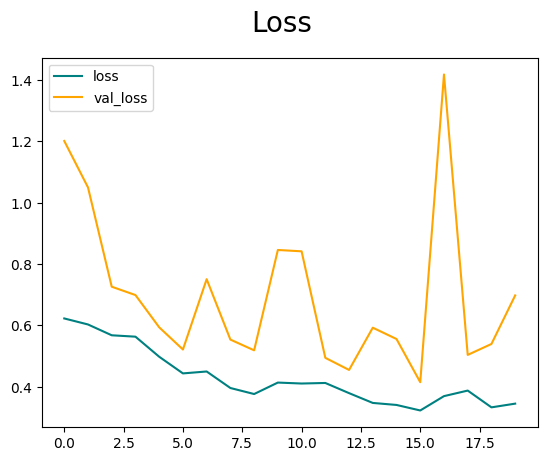

In [20]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

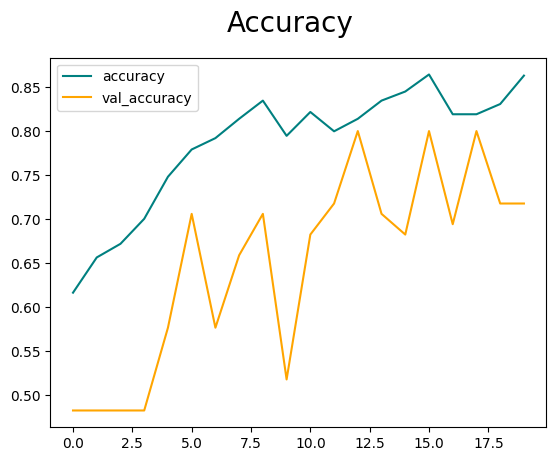

In [21]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

Model Evaluation

In [22]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [23]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 331ms/step


In [24]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6464471>

In [25]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8038793>

In [26]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6565774>

Test

In [27]:
!pip install opencv-python -q

In [28]:
import cv2

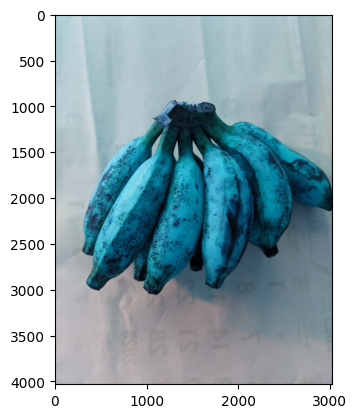

In [101]:
img = cv2.imread('/content/good-banana-detection-chemical-or-not/Banana/Banana/Chemical/Abul/PXL_20240124_091931737.jpg')
plt.imshow(img)
plt.show()

In [102]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255


In [103]:
scaled_image.shape

TensorShape([128, 128, 3])

In [104]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [105]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 31ms/step


In [106]:
yhat

array([[0.00117772]], dtype=float32)

In [107]:
class_names

['Chemical', 'Non-Chemical']

In [108]:
if yhat > 0.5:
    print(f'{class_names[0]}')
else:
    print(f'{class_names[1]}')


Non-Chemical
